#### PCA, Hierarchical clustering and plotting
In this notebook, we performed a pca dimension reduction, continued with a hierarchical clustering and plotted the results for different datasets.

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import data_exploration as de
import data_cleanup as dc

In [2]:
aa = pd.read_csv('../DMS_data/aminoacids.csv')
gia_null_eto: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv')

#Data cleaning
norm_frame_p53 = dc.aufteilung_mut_pos(dc.norm(gia_null_eto))
feature_matrix_aa = dc.clean_aa(aa)

In [3]:
dist_chem = de.aa_distance_matrix(aa)

dist_wt_p53 = de.dms_distance_matrix_wt(norm_frame_p53)
dist_mut_p53 = de.dms_distance_matrix_mutated(norm_frame_p53)

mean_subs_wt_p53 = dc.rmv_na(de.mean_substitutions(norm_frame_p53))
mean_subs_mut_p53 = dc.rmv_na(de.mean_substitutions(norm_frame_p53).T)

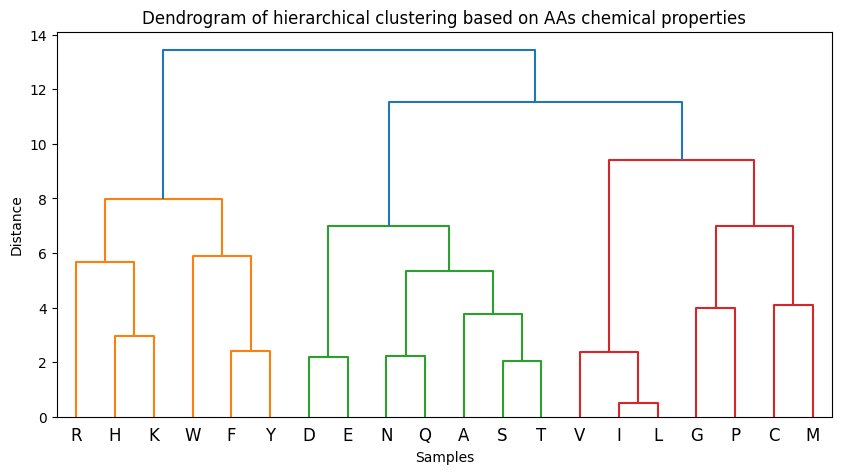

---


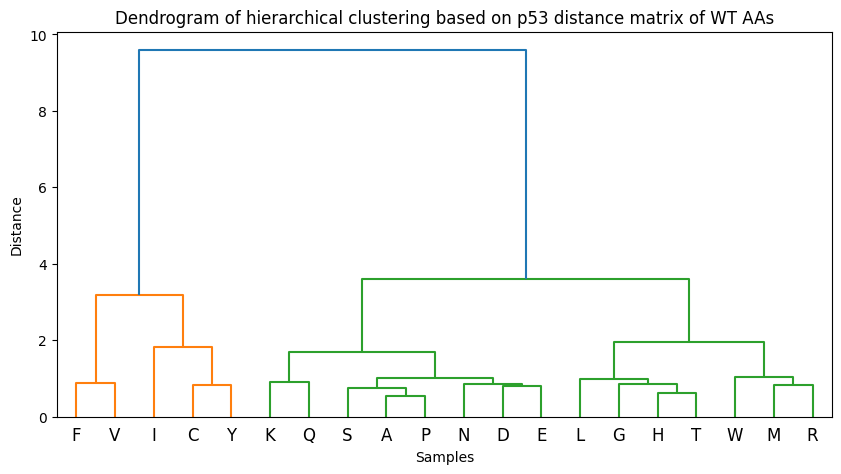

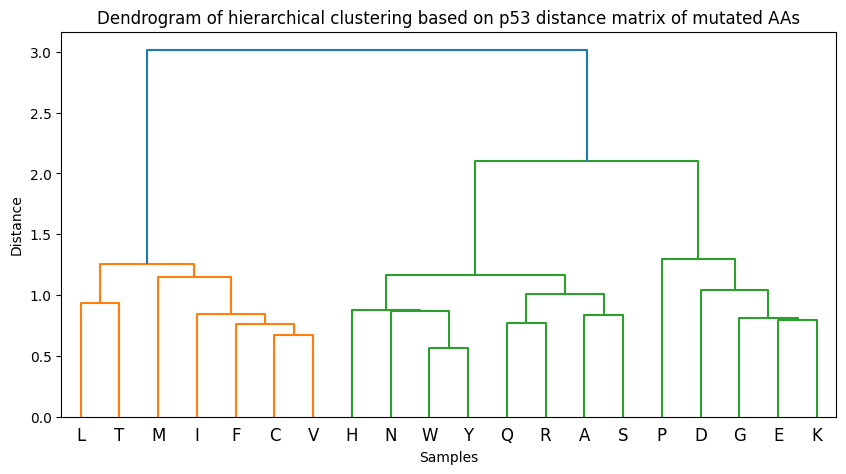

---


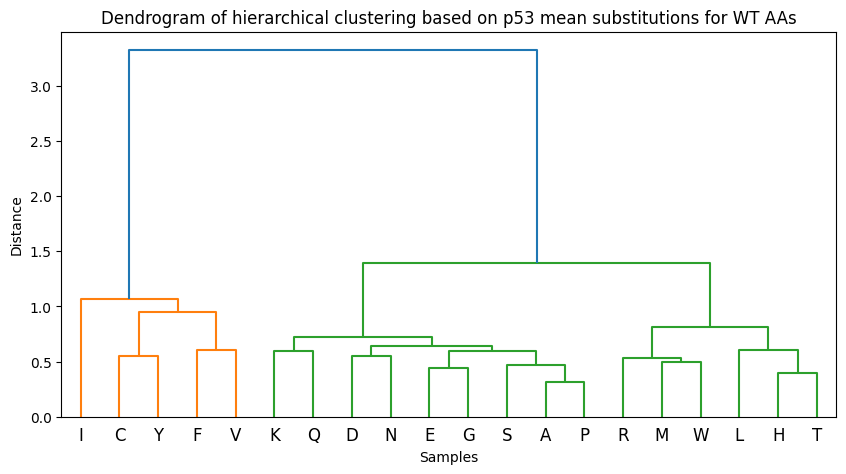

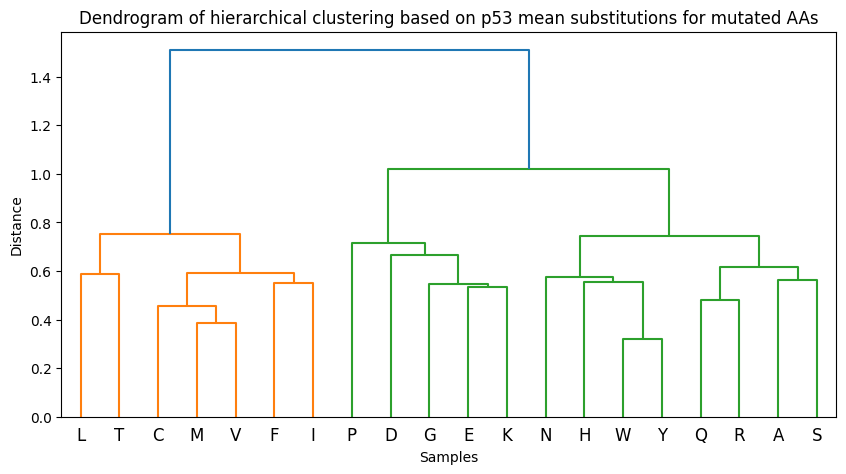

In [4]:
# hierarchical ward clustering
de.plot_hier_clust(dist_chem, title = "AAs chemical properties")
print("---")
de.plot_hier_clust(dist_wt_p53, title = "p53 distance matrix of WT AAs")
de.plot_hier_clust(dist_mut_p53, title = "p53 distance matrix of mutated AAs")
print("---")
de.plot_hier_clust(mean_subs_wt_p53, title = "p53 mean substitutions for WT AAs")
de.plot_hier_clust(mean_subs_mut_p53, title = "p53 mean substitutions for mutated AAs")

In [5]:
#determine optimal amount of clusters. Algorithm not optimized, but quite a good estimation
clusters_by_sil_chem = de.determine_clusters_silhouette(feature_matrix_aa)

clusters_by_sil_p53 = de.determine_clusters_silhouette(dc.rmv_na(dc.df_transform(norm_frame_p53)))


print (clusters_by_sil_chem)
print ("---")
print (clusters_by_sil_p53)

4
---
6


Explained variance for PCA of AAs clustered by chemical properties:
PC1: 0.36
PC2: 0.23


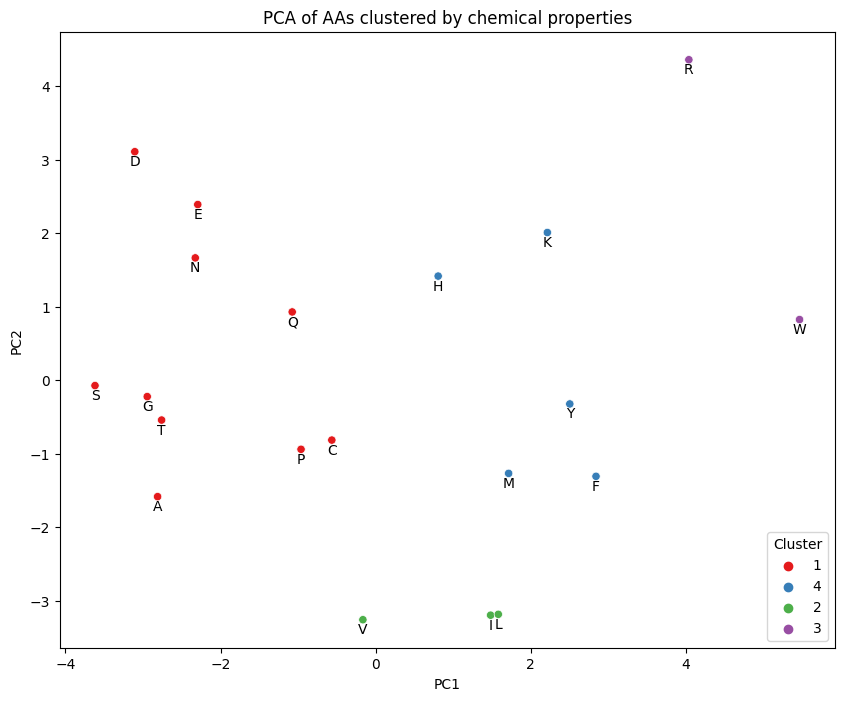

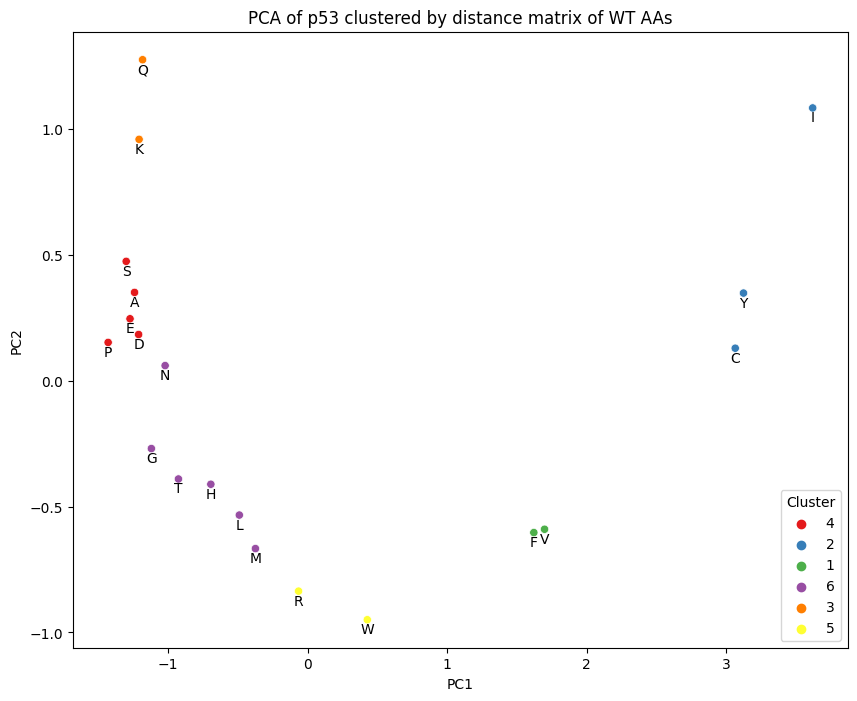

Explained variance for PCA of p53 clustered by distance matrix of mutated AAs:
PC1: 0.43
PC2: 0.16


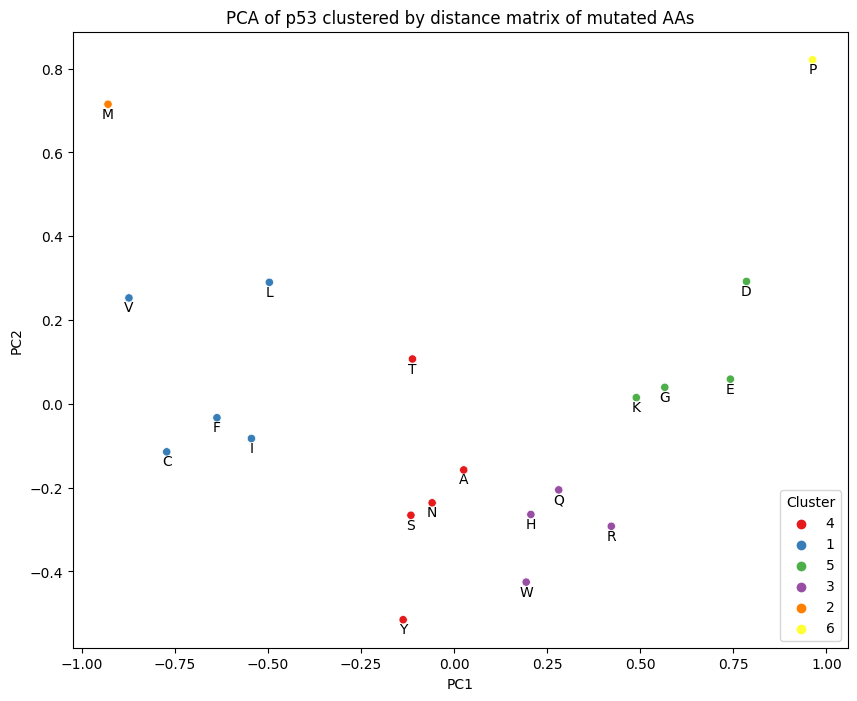

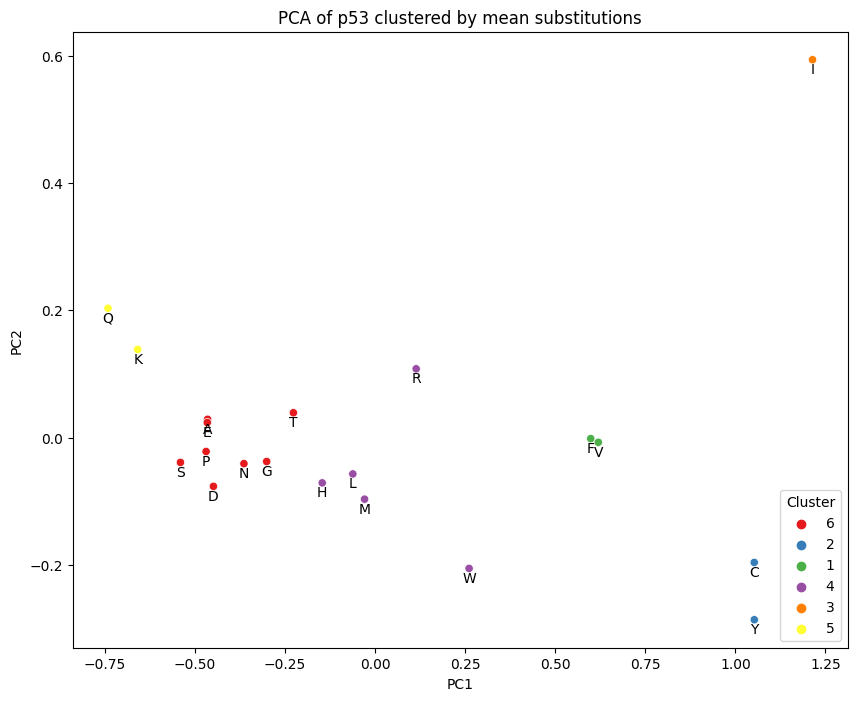

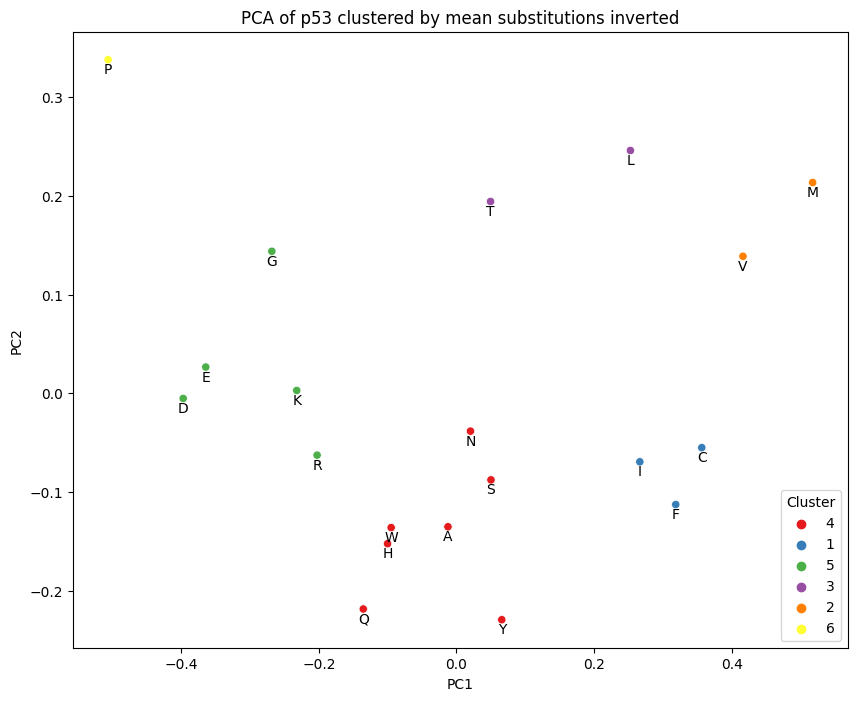

In [9]:
# Plotting, after pca and hierarchical clustering. clusters are defined by the colors shown in the legend.
de.pca_hierarchical_plot(dist_chem, optimal_num_cluster= clusters_by_sil_chem, title = "AAs clustered by chemical properties", show_var=True)

de.pca_hierarchical_plot(dist_wt_p53, optimal_num_cluster=clusters_by_sil_p53, title = "p53 clustered by distance matrix of WT AAs")
de.pca_hierarchical_plot(dist_mut_p53, optimal_num_cluster=clusters_by_sil_p53, title = "p53 clustered by distance matrix of mutated AAs", show_var=True)

de.pca_hierarchical_plot(mean_subs_wt_p53, optimal_num_cluster=clusters_by_sil_p53, title = "p53 clustered by mean substitutions")
de.pca_hierarchical_plot(mean_subs_mut_p53, optimal_num_cluster=clusters_by_sil_p53, title = "p53 clustered by mean substitutions inverted")

# variance explained by first two PCs